author: Samuel Begg

date: 06/04/2024

Compute Fisher information for a periodically driven XY model, as discussed in Mishra, Bayat, Phys. Rev. Lett. 127, 080504 (2021)

1. Define simulation parameters

In [4]:
import methods
import numpy as np
import scipy.linalg as lin
from datetime import datetime
import copy
from joblib import Parallel, delayed

stem0 = '/Users/samuelbegg/'
stem = stem0  + 'Documents/Projects/Sensing/'

# System parameters for periodic boundary condition spin chain.
J = 1.0
gamma = 1.0
h1 = 0 # The periodic field is set to zero when considering the ground-state
sites = 6000
boundary_conditions = 'ABC' #'PBC' = periodic boundary conditions or 'ABC' = anti-periodic boundary conditions

# Notes: 
# The boundary conditions reflects the fermion parity of the ground-state.
# The Fourier transform definition is automatically adjusted based on number sites and boundary conditions, as in arXiv:1707.02400.

#Initial state
initial_state = 'ground_state' 
# 'ground_state': starts in the system ground-state. 
# 'flips': manually flips specific spins (with the rest down), see below. Default: single flip. Odd number of excitations (spin) = even parity (fermions) = PBC. 
# 'momentum': a k = 0 momentum state. Even parity = PBC.
# 'spin_up': all spins up, odd number excitations (spin) = even parity = PBC, even number excitations (spin) = odd parity (fermions) = ABC

# Sensing parameters
phasepoints = 41 # points to sampling h0
h0mat = np.linspace(-2.1,2.1,phasepoints)  # range of points to sample
sub_system_range = np.arange(2,int(102)+1,20) # range of subsystem sizes for evaluating Fisher information
sub_system_edge = 0 #index of the first site in the sub-system, 0 is the left boundary site.

# Computational 
tol = 10**(-10) # when evaluating the Fisher information we don't consider singular terms for which |1 - (w[rr]*w[ss])| < tol 
shift = 10**(-7) # finite division size for calculating derivative of reduced density matrix, i.e. drho/dh0 ~ (rho(h0) - rho(h0 + shift))/shift for the order2 version
derivative_estimator = 'order2' # 2nd order = 'order2' or 4th order 'order4' approximation for the derivative of reduced density matrix
num_cores = 16  # number of cores to parallelize with
save_results = 'save' # 'save' or 'bin' (don't save)



2. Calculate Fisher information for ground state

In [ ]:
Fishermat = np.zeros([np.size(sub_system_range),np.size(h0mat)])

#Calculate fisher information for different subsystem sizes and h0 values
output = Parallel(n_jobs=num_cores)(delayed(methods.Fisher_Groundstate)(J, gamma, h0mat[uu], h1, sites, sub_system_range, sub_system_edge, tol, shift, derivative_estimator, boundary_conditions) for uu in range(0,np.size(h0mat)))

Fisher_mat = []

particle_numberL = []

for kk in range(0,phasepoints):
    
    data = output[kk]

    Fisher_mat = Fisher_mat + [data[0]]

    particle_numberL = particle_numberL + [data[1]]

Fishermat= np.asarray(Fisher_mat)

particle_number = np.asarray(particle_numberL)


3. Calculate ground state Fisher information for different gamma values

In [3]:
#Want to see scaling for some different gamma values too
gmat = [0.1,0.5,1]

output = Parallel(n_jobs=num_cores)(delayed(methods.Fisher_Groundstate)(J, gmat[gg], 1.0, h1, sites, sub_system_range, sub_system_edge, tol, shift, derivative_estimator, boundary_conditions) for gg in range(0,np.size(gmat)))

Fisher_mat = []

particle_numberG = []

for kk in range(0,np.size(gmat)):
    
    data = output[kk]

    Fisher_mat = Fisher_mat + [data[0]]

    particle_numberG = particle_numberG + [data[1]]

FishermatGamma= np.asarray(Fisher_mat)

particle_numberG = np.asarray(particle_numberG)


h0h0  1.01.0
h0 
1.0


KeyboardInterrupt: 

Plot Fisher information for groundstates

(1.4442587912537999-4.1073625259220655e-19j)
(1.5886907185862762+2.5330709735516467e-19j)
(1.6148105043085306+1.2934516335760519e-19j)


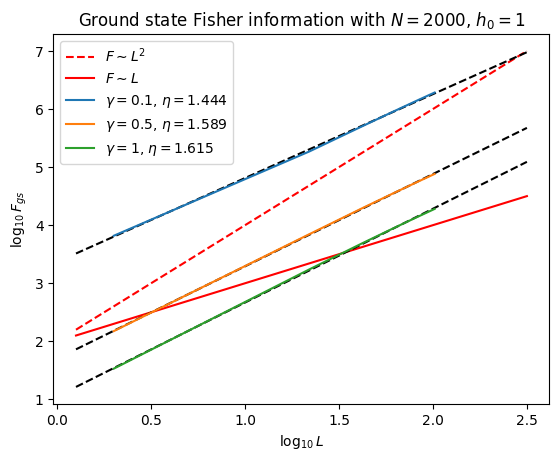

In [ ]:
if save_results == 'save':
    
    np.save('ResultsGS/gmat.npy',gmat)
    np.save('ResultsGS/Fisher_mat_Gamma.npy',FishermatGamma)
    np.save('ResultsGS/Fisher_mat.npy',Fisher_mat)
    np.save('ResultsGS/h0mat.npy',h0mat)
    np.save('ResultsGS/subsystem.npy',sub_system_range)

import matplotlib.pyplot as plt
plot_system_size_scaling = 'yes'

if plot_system_size_scaling == 'yes':



    # for ss in range(1,np.size(sub_system_range),2):

    #     plt.plot(h0mat,Fishermat[:,ss],'--o',label = 'L=' + str(sub_system_range[ss]))

    # plt.ylabel(r'$F_{gs}$')
    # plt.xlabel(r'$h_0$')
    # plt.title('Ground state Fisher information with $N = $' + str(sites) + ', $\gamma=$' + str(gamma))
    # plt.legend()
    # plt.show()

    # x = np.linspace(0.25,1.5,1000)
    # plt.plot(x,2*x-1,'--r',label = r'$F \sim L^{2}$')
    # plt.plot(x,x-1,'-r',label = r'$F \sim L$')
    # plt.plot(np.log10(sub_system_range),np.log10(Fishermat[int(np.size(h0mat)/2),:]),label = r'$h_0=$' + str(np.round(h0mat[int(np.size(h0mat)/2)],3)))
    # #plt.plot(np.log10(sub_system_range),np.log10(Fishermat[35,:]),label = r'$h_0=$' + str(np.round(h0mat[35],3)))
    # plt.plot(np.log10(sub_system_range),np.log10(Fishermat[7,:]),label = r'$h_0=$' + str(np.round(h0mat[0],3)))
    # plt.xlabel(r'$L$')
    # plt.ylabel(r'$F_{gs}$')
    # plt.title('Ground state Fisher information with $N = $' + str(sites) + ', $\gamma=$' + str(gamma))
    # plt.legend()
    # plt.show()

    x = np.linspace(0.1,2.5,1000)
    plt.plot(x,2*x+2,'--r',label = r'$F \sim L^{2}$')
    plt.plot(x,x+2,'-r',label = r'$F \sim L$')



    ranges = np.arange(0,np.size(sub_system_range))

    a0_0, a1 = np.polyfit(np.log10(sub_system_range[ranges]),np.log10(FishermatGamma[0,ranges]),1)
    plt.plot(x,a0_0*x+a1,'--k')

    print(a0_0)
    a0_1, a1 = np.polyfit(np.log10(sub_system_range[ranges]),np.log10(FishermatGamma[1,ranges]),1)
    plt.plot(x,a0_1*x+a1,'--k')
    print(a0_1)
    a0_2, a1 = np.polyfit(np.log10(sub_system_range[ranges]),np.log10(FishermatGamma[2,ranges]),1)
    plt.plot(x,a0_2*x+a1,'--k')
    print(a0_2)


    plt.plot(np.log10(sub_system_range),np.log10(FishermatGamma[0,:]),label = r'$\gamma=$' + str(np.round(gmat[0],3))+ r', $\eta = $' + str(np.round(np.real(a0_0),3)))
    plt.plot(np.log10(sub_system_range),np.log10(FishermatGamma[1,:]),label = r'$\gamma=$' + str(np.round(gmat[1],3))+ r', $\eta = $' + str(np.round(np.real(a0_1),3)))
    plt.plot(np.log10(sub_system_range),np.log10(FishermatGamma[2,:]),label = r'$\gamma=$' + str(np.round(gmat[2],3))+ r', $\eta = $' + str(np.round(np.real(a0_2),3)))
    plt.title('Ground state Fisher information with $N = $' + str(sites) + ', $h_0=1$')
    plt.xlabel(r'$\log_{10} L$')
    plt.ylabel(r'$\log_{10} F_{gs}$')
    plt.legend()
    plt.show()


/Users/samuelbegg/Library/Python/3.9/lib/python/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Users/samuelbegg/Library/Python/3.9/lib/python/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


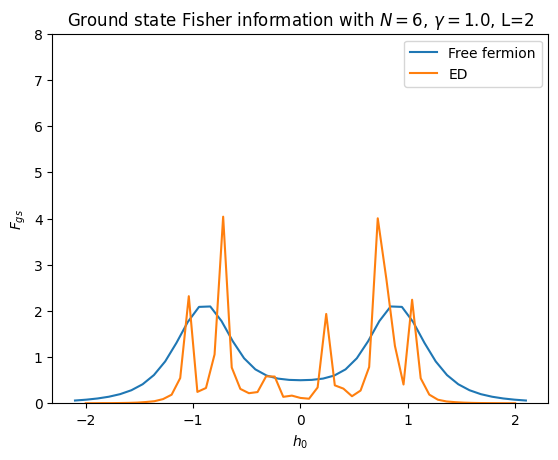

[0.06063422-6.43054549e-29j 0.07895892-1.00970298e-28j
 0.10492547+1.09550501e-29j 0.14257878+2.90079226e-31j
 0.1984414 +8.15226531e-29j 0.28302239-1.83963920e-29j
 0.41281431-2.13978564e-28j 0.61165829+1.80006560e-30j
 0.9068846 +2.29632798e-28j 1.30849993+1.42873156e-28j
 1.7588269 -3.40251274e-32j 2.08722644+1.47867899e-28j
 2.09640831+4.76689300e-28j 1.77995593-2.78288148e-28j
 1.34288278+2.70354359e-29j 0.97497463+4.27845442e-29j
 0.7348092 -1.07248013e-29j 0.60092236+5.30717092e-29j
 0.53510016+4.45206923e-29j 0.50726509-3.29613720e-30j
 0.5       -1.34524653e-43j 0.50745958+8.81984353e-29j
 0.53520469+4.38356936e-29j 0.60100306-3.56041155e-30j
 0.73488564-7.64445709e-30j 0.97505591-8.63846600e-32j
 1.34296783+4.49278642e-28j 1.78002641-2.48940357e-28j
 2.0964336 +1.70741426e-28j 2.08719483-9.57574948e-28j
 1.75876231-1.86021400e-28j 1.30843429-1.13132934e-27j
 0.90683347-4.31586399e-33j 0.611623  -1.70800238e-28j
 0.41279111+7.01666853e-32j 0.28300729-6.00032177e-28j
 0.1984314

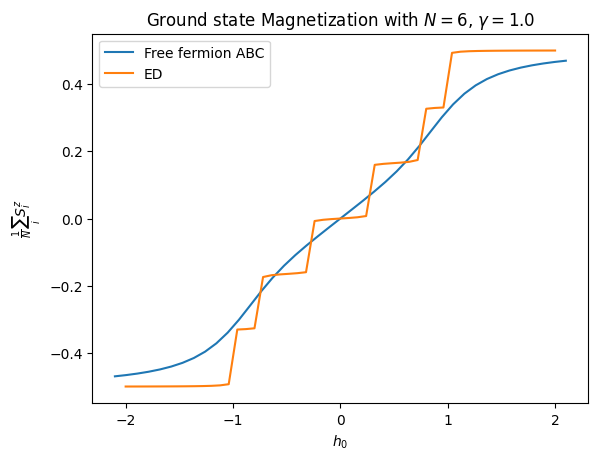

[-2.   -1.92 -1.84 -1.76 -1.68 -1.6  -1.52 -1.44 -1.36 -1.28 -1.2  -1.12
 -1.04 -0.96 -0.88 -0.8  -0.72 -0.64 -0.56 -0.48 -0.4  -0.32 -0.24 -0.16
 -0.08  0.    0.08  0.16  0.24  0.32  0.4   0.48  0.56  0.64  0.72  0.8
  0.88  0.96  1.04  1.12  1.2   1.28  1.36  1.44  1.52  1.6   1.68  1.76
  1.84  1.92  2.  ]
[-2.1   -1.995 -1.89  -1.785 -1.68  -1.575 -1.47  -1.365 -1.26  -1.155
 -1.05  -0.945 -0.84  -0.735 -0.63  -0.525 -0.42  -0.315 -0.21  -0.105
  0.     0.105  0.21   0.315  0.42   0.525  0.63   0.735  0.84   0.945
  1.05   1.155  1.26   1.365  1.47   1.575  1.68   1.785  1.89   1.995
  2.1  ]


In [ ]:
#Comparison vs ED

ss = 0
plt.plot(h0mat,Fishermat[:,ss],label = 'Free fermion')

#Fisher vs h
ED_fisher = np.load('/Users/samuelbegg/Documents/Sensing/ed_results/Fisher.npy')
hzmat = np.load('/Users/samuelbegg/Documents/Sensing/ed_results/hzmat.npy')
plt.plot(hzmat,ED_fisher,'-',label='ED')
plt.ylabel(r'$F_{gs}$')
plt.xlabel(r'$h_0$')
plt.title('Ground state Fisher information with $N = $' + str(sites) + ', $\gamma=$' + str(gamma) + ', L=' + str(sub_system_range[ss]))
plt.legend()
plt.ylim(0,8)
plt.show()

print(Fishermat[:,ss], 'Free ferm')
print(ED_fisher, 'ED_Fisher')

#Sz vs h
ED_spin = np.load('/Users/samuelbegg/Documents/Sensing/ed_results/mag.npy')
hzmat = np.load('/Users/samuelbegg/Documents/Sensing/ed_results/hzmat.npy')
plt.plot(h0mat,particle_number-0.5,label = 'Free fermion ' + boundary_conditions)
plt.plot(hzmat,ED_spin ,'-',label='ED')
plt.ylabel(r'$\frac{1}{N}\sum_i S^z_i$')
plt.xlabel(r'$h_0$')
plt.title('Ground state Magnetization with $N = $' + str(sites) + ', $\gamma=$' + str(gamma))
plt.legend()
plt.show()

#Discrepancy Sz vs Exact Diagonalization
# plt.plot(h0mat,particle_number-0.5 - ED_spin,label = 'Free fermion ' + boundary_conditions)
# plt.ylabel(r'Discrepency Sz')
# plt.xlabel(r'$h_0$')
# plt.title('$N = $' + str(sites) + ', $\gamma=$' + str(gamma))
# plt.legend()
# plt.ylim(-0.01,0.01)
# plt.show()

#Discrepancy Fisher vs Exact Diagonalization
# plt.plot(h0mat,Fishermat[:,ss] - ED_fisher,label = 'Free fermion ' + boundary_conditions)
# plt.ylabel(r'Discrepency Fisher')
# plt.xlabel(r'$h_0$')
# plt.title('$N = $' + str(sites) + ', $\gamma=$' + str(gamma))
# plt.legend()
# plt.ylim(-0.01,0.01)
# plt.show()


print(hzmat)
print(h0mat)